# **Convolutions, Blurring and Sharpening Images**

# Convolutions
In image processing, convolution is a fundamental operation used for various tasks such as image filtering, edge detection, and feature extraction. Convolution involves applying a mathematical operation to an image to produce a new image, known as the convolution result or output image.

Here's how convolution works:

1. **Kernel or Filter**: Convolution begins with a small matrix called a kernel or filter. The kernel is a matrix of real numbers that defines the operation to be applied to the image. Common kernels include Gaussian blur, edge detection, sharpening, and embossing filters.

2. **Sliding Window**: The kernel is then placed over the input image, and a sliding window moves across the image one pixel at a time. At each position, the kernel is centered over a pixel or a group of pixels in the input image.

3. **Element-wise Multiplication and Summation**: At each position, the elements of the kernel are multiplied element-wise with the corresponding pixel values in the input image that are covered by the kernel. The resulting products are then summed up to obtain a single value, which forms a pixel in the output image.

4. **Output Image**: The resulting sum is placed in the corresponding position of the output image. This process is repeated for every pixel in the input image, resulting in a new image that represents the convolution result.

Mathematically, convolution between an input image $( I )$ and a kernel $( K )$ at position $( (x, y) )$ is defined as:

$(I * K)(x, y) = \sum_{i} \sum_{j} I(x-i, y-j) \cdot K(i, j)$

where $( I(x-i, y-j) )$ denotes the pixel value in the input image at position $( (x-i, y-j) )$, $( K(i, j) )$ denotes the kernel value at position $( (i, j) )$, and the summation is performed over all elements of the kernel.

Convolution is a powerful technique in image processing because it allows for the extraction of features from images, such as edges, textures, and patterns, by applying different kernels. It also enables image enhancement, noise reduction, and other image manipulation operations. Additionally, convolutional neural networks (CNNs), a class of deep learning models widely used in computer vision tasks, are built upon the concept of convolution, where convolutional layers are used to extract features from input images.

# Blurring
Blurring, also known as smoothing, in image processing refers to the process of reducing the sharpness or high-frequency components of an image. This is achieved by averaging the pixel values in the image over a neighborhood or region. Blurring is commonly used for tasks such as noise reduction, image deblurring, and pre-processing for object detection or recognition algorithms.

There are several techniques for blurring images, with some of the most common ones including:

1. **Gaussian Blur:** Gaussian blur is a widely used blurring technique that applies a Gaussian kernel to the image. The Gaussian kernel is a bell-shaped curve that weights the neighboring pixels based on their distance from the center pixel. This weighting ensures that closer pixels contribute more to the blurred result, resulting in a smooth and natural-looking blur.

2. **Mean Blur:** Mean blur, also known as box blur, applies a simple averaging operation to the pixel values within a rectangular neighborhood. Each pixel in the output image is computed as the average of the pixel values within the neighborhood. Mean blur is effective for reducing noise in the image but may result in loss of image details.

3. **Median Blur:** Median blur replaces each pixel value with the median value of the pixel values within a neighborhood. This technique is particularly effective for removing salt-and-pepper noise, where isolated pixels have extreme values that do not correspond to the surrounding pixels. Median blur preserves edges better than mean blur but may not be as effective for reducing other types of noise.

4. **Bilateral Blur:** Bilateral blur is a more sophisticated blurring technique that preserves edges while reducing noise. It considers both spatial distance and intensity difference when averaging pixel values within a neighborhood. Pixels with similar intensities and spatial proximity contribute more to the blurred result, while pixels with large intensity differences or spatial distances contribute less, preserving edge details.

Blurring is an essential operation in image processing, as it helps improve the quality of images and makes subsequent processing steps more robust. The choice of blurring technique depends on factors such as the type of noise present in the image, the desired level of blurring, and the computational complexity of the technique.

####**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [11]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 7):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Blurring using Convolutions**

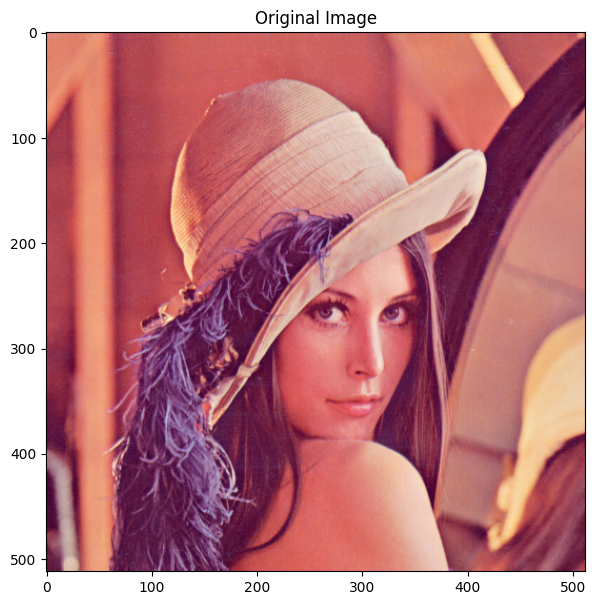

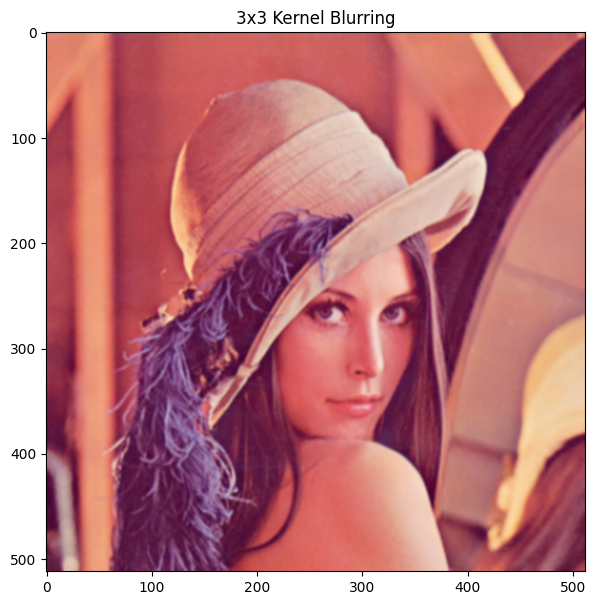

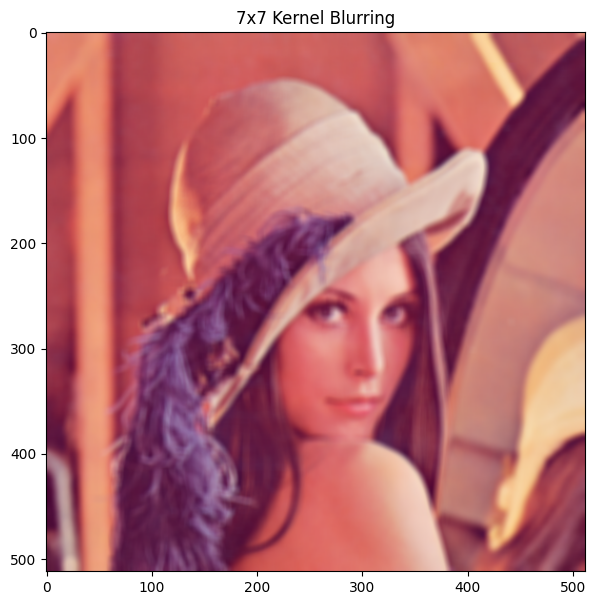

In [12]:
import cv2
import numpy as np

image = cv2.imread('image/lena.png')
imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV**
# Regular Blurring

Regular blurring, also known as simple blurring or averaging, is a basic technique used in computer vision to reduce noise and smooth out an image. It involves replacing each pixel value in the image with the average of the pixel values in its neighborhood. Mathematically, regular blurring can be represented using a convolution operation with a specific kernel.

Let's denote the input image as $( I )$ and the output (blurred) image as $( B )$. We can define the regular blurring operation using a $( n \times n )$ kernel $( K )$ as follows:

$B(x, y) = \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} I(x+i, y+j)$

In this equation:
- $( B(x, y) )$ represents the pixel value at position $( (x, y) )$ in the blurred image.
- $( I(x+i, y+j) )$ represents the pixel value at position $( (x+i, y+j) )$ in the input image.
- $( n \times n )$ is the size of the kernel, specifying the neighborhood over which the averaging is performed.
- $( \frac{1}{n^2} )$ is a normalization factor to ensure that the pixel values in the blurred image remain within the same intensity range as the original image.

The $( n \times n )$ kernel $( K )$ used for regular blurring has all its elements set to $( \frac{1}{n^2} )$. Visually, this kernel represents equal weighting for all pixels within the neighborhood, resulting in a uniform averaging effect.

The convolution operation involves sliding the kernel over the input image, computing the weighted average of pixel values in the neighborhood defined by the kernel at each position, and assigning the result to the corresponding pixel in the output image.

Regular blurring is effective for reducing high-frequency noise in an image and smoothing out sharp transitions between pixel values. However, it may also cause loss of fine details and edges in the image. The choice of kernel size $( n \times n )$ depends on the level of blurring desired and the characteristics of the noise present in the image. Smaller kernel sizes produce less blurring but may not effectively reduce noise, while larger kernel sizes produce more pronounced blurring but may also blur important details in the image.

# Gaussian Blurring

Gaussian blurring is a common technique used in computer vision and image processing to reduce noise and smooth out images while preserving important features and edges. It applies a Gaussian filter kernel to the image, which assigns higher weights to pixels closer to the center of the kernel and lower weights to pixels further away, mimicking the shape of a Gaussian distribution.

Mathematically, the Gaussian blur operation can be represented as a convolution between the input image $( I )$ and a Gaussian kernel $( G )$. The Gaussian kernel is defined by the Gaussian function:

$G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)$

where $( x )$ and $( y )$ are the coordinates in the kernel, and $( \sigma )$ is the standard deviation of the Gaussian distribution. The standard deviation $( \sigma )$ controls the spread or width of the Gaussian curve, with larger values resulting in a wider distribution and more smoothing.

The Gaussian kernel is usually centered around the origin, and its size (often denoted by $( k \times k )$) determines the extent of the blurring effect. Commonly, the kernel size is chosen to be odd, such as $( 3 \times 3 )$, $( 5 \times 5 )$, or $( 7 \times 7 )$, to ensure a symmetric kernel with a well-defined center.

To perform Gaussian blurring on an image, the Gaussian kernel is convolved with the input image at each pixel location. The convolution operation involves overlaying the kernel onto the image such that the center of the kernel is aligned with each pixel position. Then, the pixel values within the kernel are multiplied by the corresponding values in the kernel, and the resulting products are summed up to obtain the value of the blurred pixel.

Mathematically, the Gaussian blur operation $( B )$ on an image $( I )$ can be defined as:

$B(x, y) = \sum_{i=-\frac{k}{2}}^{\frac{k}{2}} \sum_{j=-\frac{k}{2}}^{\frac{k}{2}} I(x+i, y+j) \cdot G(i, j)$

where $B(x, y)$ is the pixel value of the blurred image at position $( (x, y) )$, $( I(x+i, y+j) )$ is the pixel value of the input image at position $( (x+i, y+j) )$, and $( G(i, j) )$ is the value of the Gaussian kernel at position $( (i, j) )$.

Gaussian blurring effectively reduces noise and smooths out images while preserving edges and important features, making it a widely used technique in various image processing applications. The choice of the standard deviation $( \sigma )$ and the kernel size $( k \times k )$ depends on factors such as the amount of noise present in the image and the level of blurring desired.

# Median Blurring

Median blurring is a popular technique in computer vision and image processing used to reduce noise while preserving edges and details in an image. Unlike Gaussian blurring, which calculates the weighted average of pixel values in a neighborhood, median blurring replaces each pixel value with the median value of the pixel values within a specified neighborhood.

Mathematically, the median blur operation involves applying a sliding window over the image and replacing each pixel value with the median value of the pixel values within the window. The size of the window (often denoted by $( k \times k )$) determines the extent of the blurring effect, and it is typically chosen to be odd to ensure a symmetric window with a well-defined center.

Let's denote the input image as $( I )$ and the size of the sliding window as $( k \times k )$. To perform median blurring on the image, the median value of the pixel values within the window centered at each pixel position $( (x, y) )$ is calculated.

Mathematically, the median blur operation $( B )$ on an image $( I )$ can be defined as:

$B(x, y) = \text{Median}(I(x+i, y+j))$

where $( B(x, y) )$ is the pixel value of the blurred image at position $( (x, y) )$, and $( \text{Median} )$ is the median function that calculates the median value of a set of pixel values. The set of pixel values used for calculating the median value corresponds to the pixel values within the $( k \times k )$ neighborhood centered at position $( (x, y) )$.

Median blurring is particularly effective at removing impulse noise, such as salt-and-pepper noise, where isolated pixels have extreme values that do not correspond to the surrounding pixels. By replacing each pixel value with the median value within a neighborhood, median blurring effectively eliminates outliers while preserving the underlying structure and details of the image.

While median blurring is computationally efficient and robust to noise, it may not be as effective at reducing other types of noise, such as Gaussian noise. Additionally, median blurring can produce a loss of fine details and textures in the image, particularly in regions with high contrast or sharp transitions.

Overall, median blurring is a valuable tool in image processing for noise reduction and is commonly used in various applications where preserving edges and details is important.

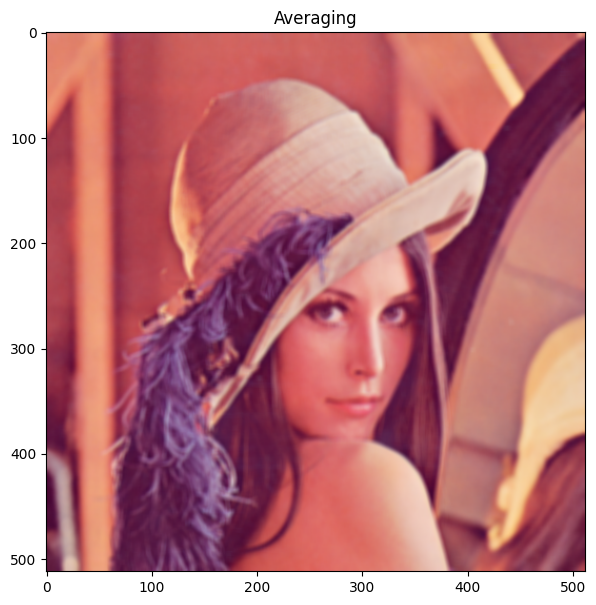

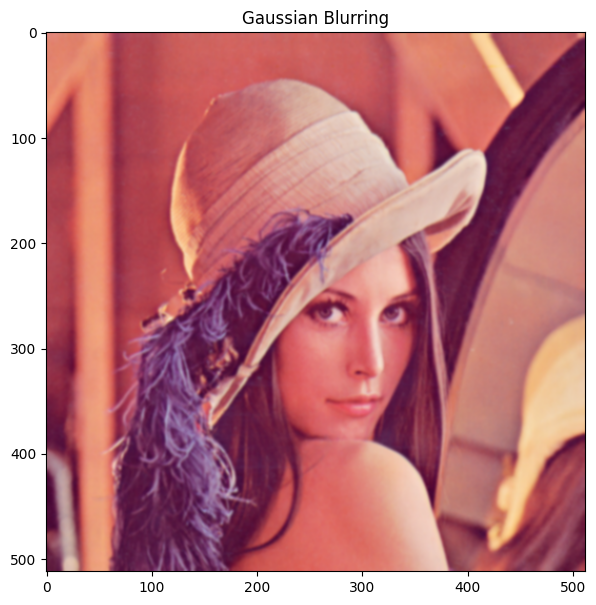

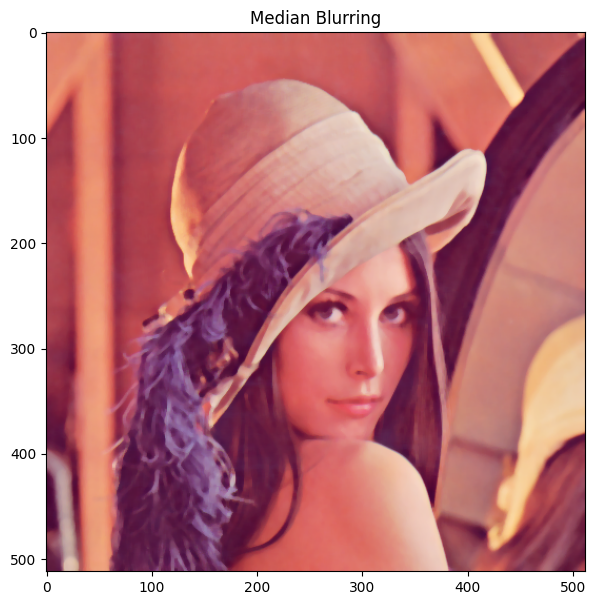

In [13]:
import cv2
import numpy as np

image = cv2.imread('image/lena.png')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

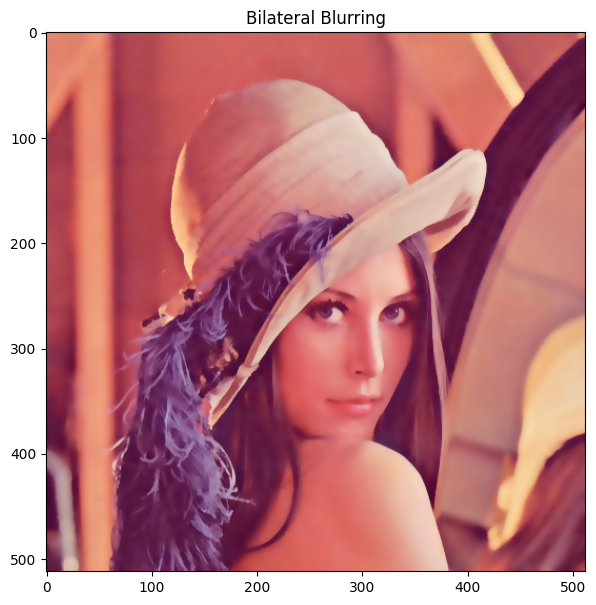

In [14]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:	

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

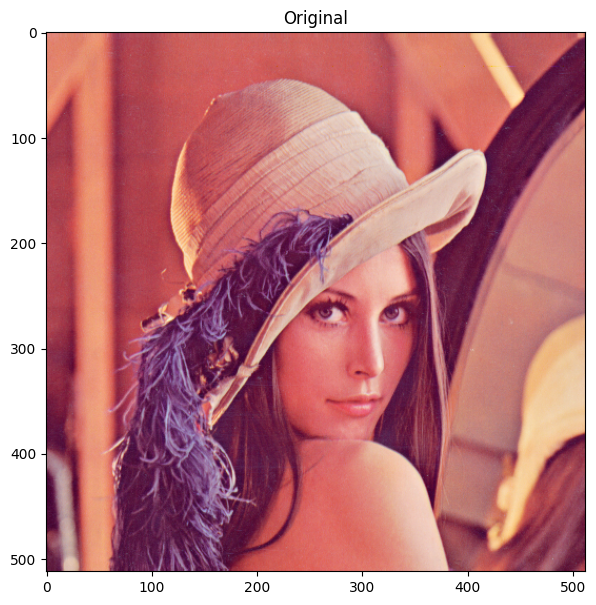

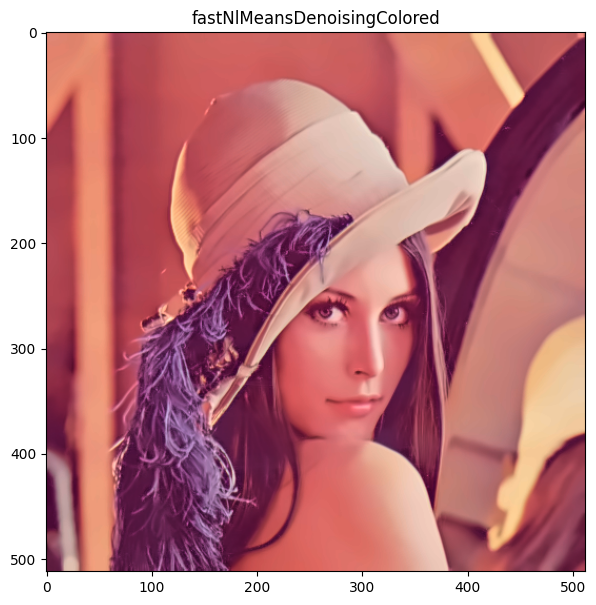

In [15]:
image = cv2.imread('image/lena.png')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

# **Image sharpening**
Image sharpening in computer vision refers to the process of enhancing the edges and details in an image to make it appear clearer and more defined. Sharpening techniques aim to increase the contrast along edges and highlight fine details while minimizing noise and artifacts.

Here are some common methods used for image sharpening:

1. **Unsharp Masking (USM):** Unsharp masking is a popular technique for image sharpening. It involves creating a blurred version of the original image (using a Gaussian blur, for example), subtracting this blurred version from the original image to obtain the high-frequency components (edges and details), and then adding these high-frequency components back to the original image. The amount of sharpening can be controlled by adjusting parameters such as the strength of the blur and the amount of enhancement applied to the high-frequency components.

2. **Laplacian/Laplacian of Gaussian (LoG) Filter:** The Laplacian filter is a second-order derivative filter that highlights areas of rapid intensity change (edges) in an image. By convolving the image with the Laplacian filter, the edges are emphasized, resulting in sharpening. The Laplacian of Gaussian (LoG) filter combines Gaussian blurring with the Laplacian filter to improve edge detection and reduce noise sensitivity.

3. **High-pass Filtering:** High-pass filters are used to emphasize high-frequency components (edges and details) in an image while suppressing low-frequency components (smooth regions). Common high-pass filters include the Sobel filter, Prewitt filter, and Scharr filter, which are often used for edge detection but can also be adapted for image sharpening.

4. **Contrast Enhancement:** Increasing the contrast of an image can also improve its sharpness. Techniques such as histogram equalization, contrast stretching, and adaptive contrast enhancement can be used to enhance the contrast of an image, making edges and details more prominent.

Image sharpening is a subjective process, and the choice of method depends on factors such as the characteristics of the image, the level of sharpening desired, and the presence of noise or artifacts. It is important to balance the enhancement of details with the preservation of natural-looking textures and the avoidance of artifacts such as halos and noise amplification.

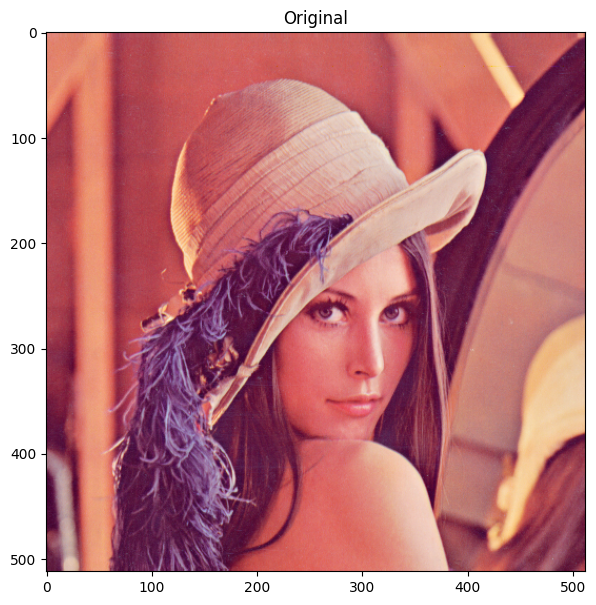

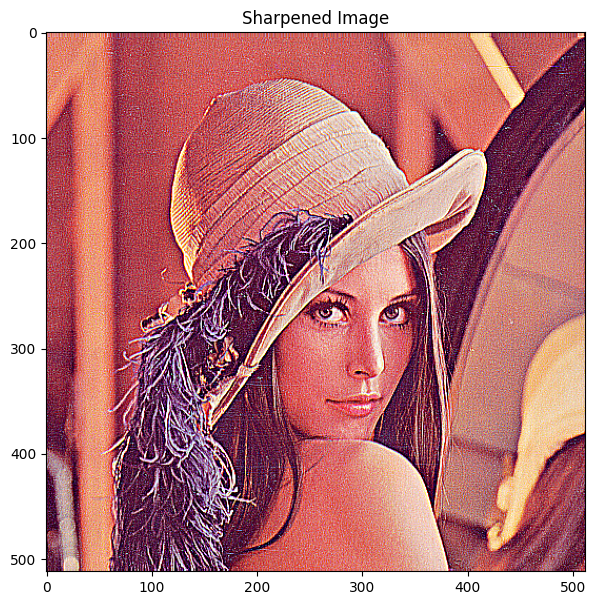

In [16]:
# Loading our image
image = cv2.imread('image/lena.png')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)